In [1]:
# Library import
import numpy as np
import random
import matplotlib.pyplot as plt
import inspect



In [2]:
N = 2  # Maximum number of possible peak
Data_size = 200000 

Parameters = np.zeros((Data_size, N, 3))  # Set of Parameters ready
print(Parameters.shape[1])

2


In [ ]:
# Lorentzian function that returns sum of multi-Lorentzian function with two arguments
def Lorentzian(x, *args):
    ''' returns sum of Multi-Lorentzian function 
    corresponding to each two arguments (a, b)'''
    
    amp = 
    center = args[::2]
    width = args[1::2]
    

    result = 0
    for i in range(len(a)):
        if a[i] > 0 and b[i] > 0:
            if len(a) == len(b):
                result += b[i] / ((x - a[i])**2 + b[i]**2)

    for xx in range(len(result)):
        result[xx] += 0.1* ((np.random.rand()*2) - 1)

    return result 
    # noise = -0.2 ~ 0.2 

In [ ]:
print(inspect.getsource(Lorentzian))

def Lorentzian(x, *args):
    ''' returns sum of Multi-Lorentzian function 
    corresponding to each two arguments (a, b)'''
    a = args[::2]
    b = args[1::2]

    result = 0
    for i in range(len(a)):
        if a[i] > 0 and b[i] > 0:
            if len(a) == len(b):
                result += b[i] / ((x - a[i])**2 + b[i]**2)

    for xx in range(len(result)):
        result[xx] += 0.1* ((np.random.rand()*2) - 1)

    return result 



In [ ]:
# X domain fixed
x = np.arange(-2, 4, 0.01)
print(len(x))

600


In [ ]:
for i in range(len(Parameters)): # For each matrix in Parameter set...

    for j in range(Parameters.shape[1]): # For each raw in each matrix...
        
        # append two argument that will be used in Lorentzian function
        # Second parameter is constrained in range from 0.1 to 0.2
        a = np.random.rand()
        Parameters[i][0] = np.array([[a, 0.1*np.random.rand() + 0.1]])
        Parameters[i][1] = np.array([[a + 2, 0.1*np.random.rand()+0.1]])
    
# Check out
print(Parameters)

[[[0.75693276 0.1843805 ]
  [2.75693276 0.18314227]]

 [[0.45396547 0.15875442]
  [2.45396547 0.1181121 ]]

 [[0.63065609 0.17173339]
  [2.63065609 0.15211821]]

 ...

 [[0.48930871 0.17136211]
  [2.48930871 0.10677476]]

 [[0.21485682 0.11639266]
  [2.21485682 0.19034322]]

 [[0.77860134 0.17393978]
  [2.77860134 0.14406967]]]


In [ ]:
# ================== Data Generating ================
Data_x = []
Data_y = []

for j in Parameters:  # For each parameter matrix...

    peak = random.randint(2, N) # Random selection of Possible peak number
    j = list(j.reshape((2*N,))) # reshape processing to put it as *args in function, Since j is matrix

    if peak == 1:
        Data_x.append(Lorentzian(x, *j[0:2]))
        Data_y.append(np.array([sum(Lorentzian(x, *j[0:2])), peak]))

    elif peak == 2:
        Data_x.append(Lorentzian(x, *j[0:4]))
        Data_y.append(np.array([j[0], j[1], j[2], j[3]]))

    elif peak == 3:
        Data_x.append(Lorentzian(x, *j[0:6]))
        Data_y.append(np.array([sum(Lorentzian(x, *j[0:6])) ,peak]))

    elif peak == 4:
        Data_x.append(Lorentzian(x, *j[0:8]))
        Data_y.append(np.array([sum(Lorentzian(x, *j[0:8])), peak]))

    elif peak == 5:
        Data_x.append(Lorentzian(x, *j[0:]))
        Data_y.append(np.array([sum(Lorentzian(x, *j[0:])), peak]))

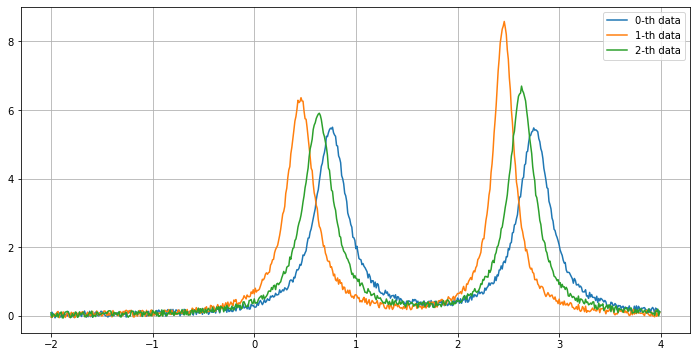

In [ ]:
# Generated Data sample check!
plt.figure(figsize=(12, 6))

for i in range(3):
    plt.plot(x, Data_x[i], label = str(i) + '-th data')
    plt.legend()
    plt.grid('on')

In [ ]:
x.shape
x = x.reshape(600)
x.shape

(600,)

In [ ]:
# Data spliting up into three group : training/validation/test

train_data = np.array(Data_x[:100000])
val_data = np.array(Data_x[100000:150000])
test_data = np.array(Data_x[150000:])

train_labels = np.array(Data_y[:100000])
val_labels = np.array(Data_y[100000:150000])
test_labels = np.array(Data_y[150000:])

In [ ]:
# size test

print(train_data.shape, train_labels.shape)
print(val_data.shape, val_labels.shape)
print(test_data.shape, test_labels.shape)

(100000, 600) (100000, 4)
(50000, 600) (50000, 4)
(50000, 600) (50000, 4)


In [ ]:
# reshape for Image-form setting
# 2차원일때만!
#train_data = train_data.reshape(100000, 20, 20, 1)
#val_data = val_data.reshape(150000, 20, 20, 1)
#test_data = test_data.reshape(50000, 20, 20, 1)


In [ ]:
# reshape for Image-form setting
# 1차원일때 변환
train_data = train_data.reshape(100000, 600, 1)
val_data = val_data.reshape(50000, 600, 1)
test_data = test_data.reshape(50000, 600, 1)


In [ ]:
# From Here on, let`s start to make Convolution Neural Network!
# Library import
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, GlobalMaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2

# Modeling
model2 = Sequential()

# 이전에 비해 필터 수만 증가시킴 : Better
model2.add(Conv1D(32, 50, activation='relu', input_shape=(600, 1)))
model2.add(MaxPooling1D(2)) 

model2.add(Conv1D(16, 40, activation='relu'))
model2.add(MaxPooling1D(2)) 

# Fully-Connected Layers
model2.add(GlobalMaxPooling1D())
model2.add(Dense(100, activation = 'relu'))
#model2.add(Dropout(0.3))
model2.add(Dense(4))

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_2 (Conv1D)            (None, 551, 32)           1632      
_________________________________________________________________
max_pooling1d_2 (MaxPooling1 (None, 275, 32)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 236, 16)           20496     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 118, 16)           0         
_________________________________________________________________
global_max_pooling1d_1 (Glob (None, 16)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               1700      
_________________________________________________________________
dense_3 (Dense)              (None, 4)                

In [ ]:
model2.compile(loss='mse', metrics=['mae'], optimizer=Adam())

In [ ]:
%%time
hist2 = model2.fit(train_data, train_labels, 
                   epochs=50, 
                   batch_size=2000,
                   validation_data=(val_data, val_labels), verbose=1)

Epoch 1/50
50/50 [==============================] - 3s 54ms/step - loss: 0.1197 - mae: 0.2298 - val_loss: 0.0453 - val_mae: 0.1439
Epoch 2/50
50/50 [==============================] - 3s 53ms/step - loss: 0.0412 - mae: 0.1348 - val_loss: 0.0396 - val_mae: 0.1310
Epoch 3/50
50/50 [==============================] - 3s 53ms/step - loss: 0.0390 - mae: 0.1296 - val_loss: 0.0383 - val_mae: 0.1278
Epoch 4/50
50/50 [==============================] - 3s 53ms/step - loss: 0.0368 - mae: 0.1259 - val_loss: 0.0352 - val_mae: 0.1233
Epoch 5/50
50/50 [==============================] - 3s 53ms/step - loss: 0.0346 - mae: 0.1214 - val_loss: 0.0337 - val_mae: 0.1198
Epoch 6/50
50/50 [==============================] - 3s 53ms/step - loss: 0.0329 - mae: 0.1174 - val_loss: 0.0321 - val_mae: 0.1154
Epoch 7/50
50/50 [==============================] - 3s 53ms/step - loss: 0.0316 - mae: 0.1143 - val_loss: 0.0315 - val_mae: 0.1108
Epoch 8/50
50/50 [==============================] - 3s 53ms/step - loss: 0.0291 - m

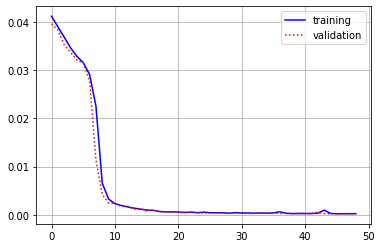

In [ ]:
# Loss plot
plt.plot(hist2.history['loss'][1:], 'b-', label="training")
plt.plot(hist2.history['val_loss'][1:], 'r:', label="validation")
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
predict = model2.predict(test_data)
predict.shape

(50000, 4)

In [ ]:
for i in range(10):
    print(predict[i])
    print(test_labels[i])
    print('==============')

[0.54267055 0.14993039 2.5397136  0.11072119]
[0.54227996 0.13974391 2.54227996 0.11098961]
[0.5575864  0.19005683 2.5560062  0.14855428]
[0.56609161 0.19704501 2.56609161 0.15048371]
[0.68537575 0.18043345 2.6792412  0.18595646]
[0.68155556 0.16654689 2.68155556 0.18548754]
[0.96633357 0.16421467 2.954014   0.18222727]
[0.95644141 0.16512012 2.95644141 0.17996182]
[0.89806944 0.12219098 2.9084907  0.11453538]
[0.87495942 0.1199288  2.87495942 0.10970506]
[0.25184318 0.14861104 2.2495573  0.18278037]
[0.23558833 0.14117955 2.23558833 0.18983692]
[0.70697105 0.11025324 2.706327   0.1010774 ]
[0.69749371 0.1038597  2.69749371 0.10497846]
[0.6619299  0.1693902  2.6643083  0.14357345]
[0.68421679 0.15770649 2.68421679 0.14118268]
[0.8852076  0.17094418 2.893965   0.14197849]
[0.90843855 0.16984902 2.90843855 0.13417928]
[0.6277887  0.18197784 2.6215866  0.17314185]
[0.61477638 0.17780736 2.61477638 0.17010388]


In [ ]:
def simple(x, *args):
    ''' returns sum of Multi-Lorentzian function 
    corresponding to each two arguments (a, b)'''
    a = args[::2]
    b = args[1::2]

    result = 0
    for i in range(len(a)):
        if a[i] > 0 and b[i] > 0:
            if len(a) == len(b):
                result += b[i] / ((x - a[i])**2 + b[i]**2)

    return result 

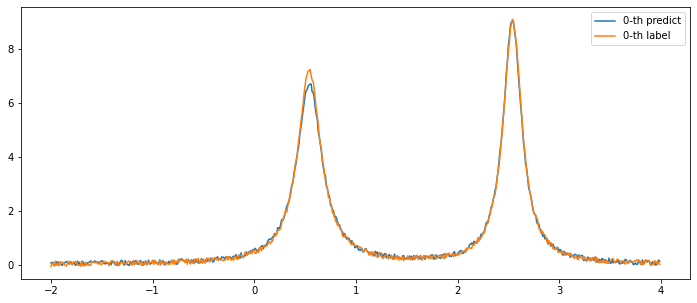

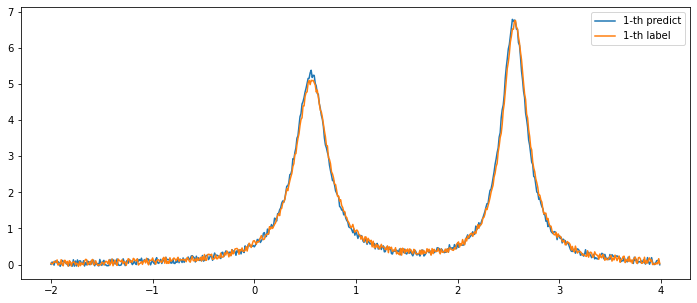

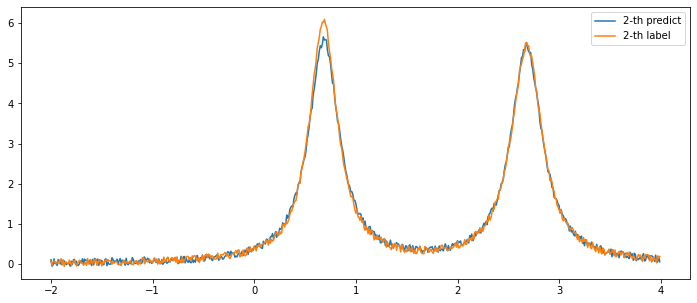

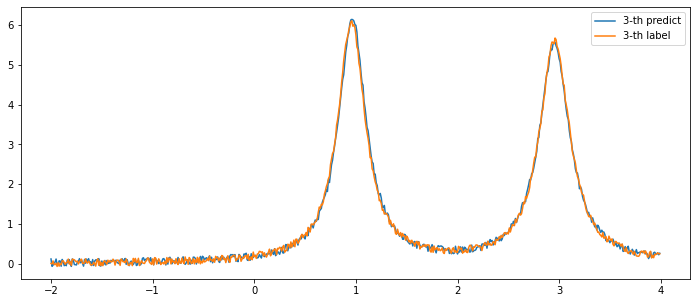

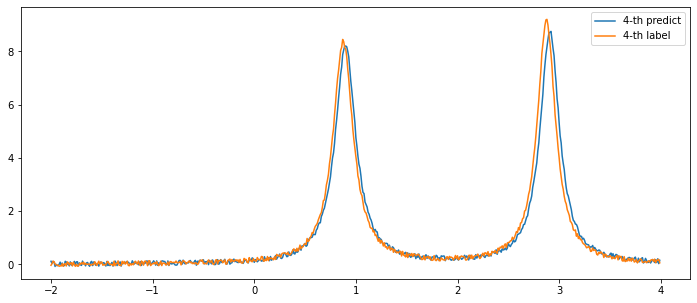

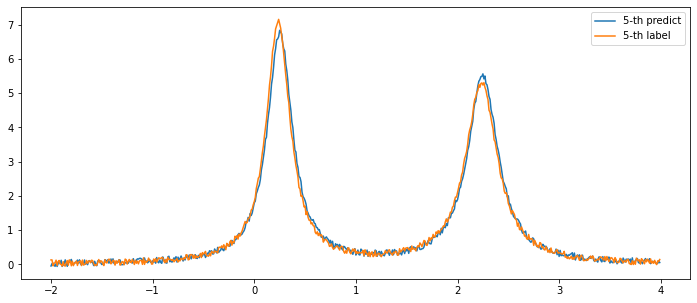

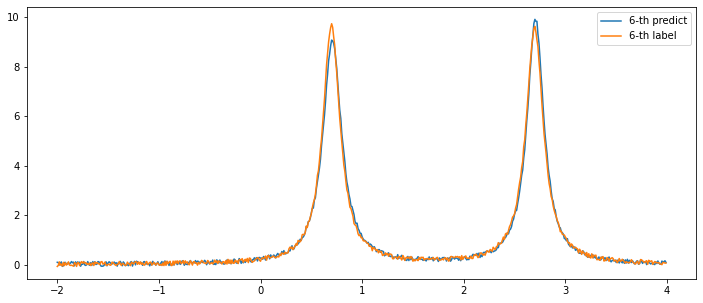

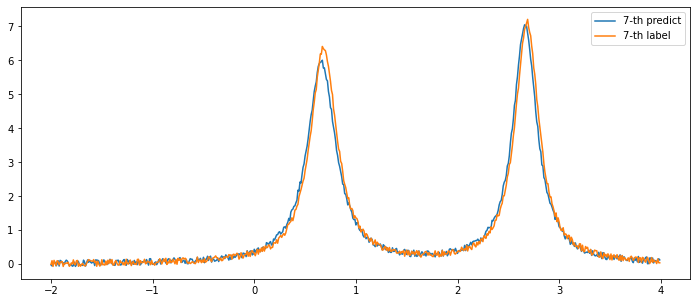

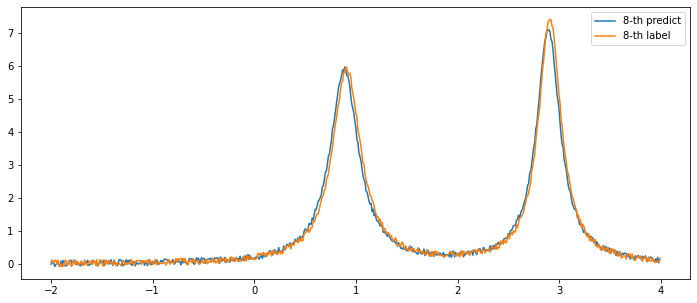

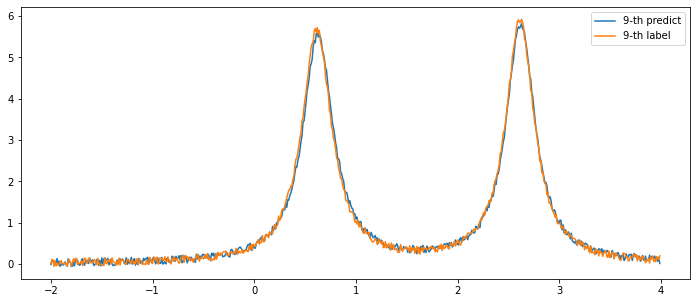

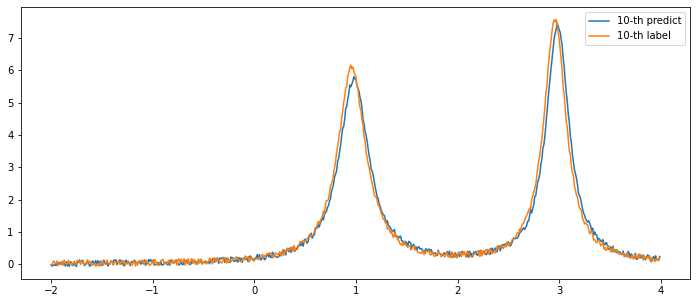

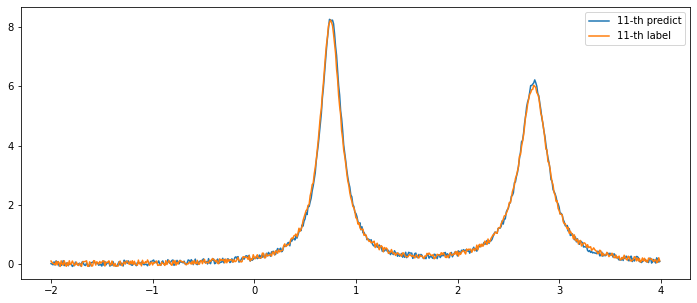

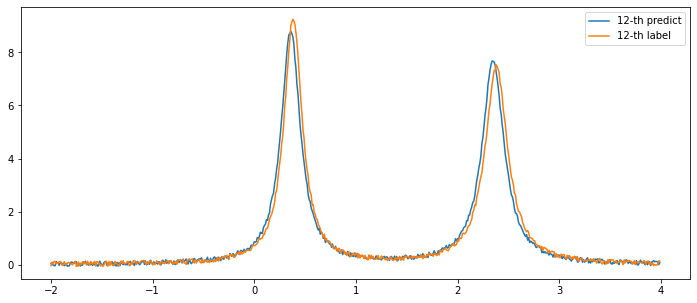

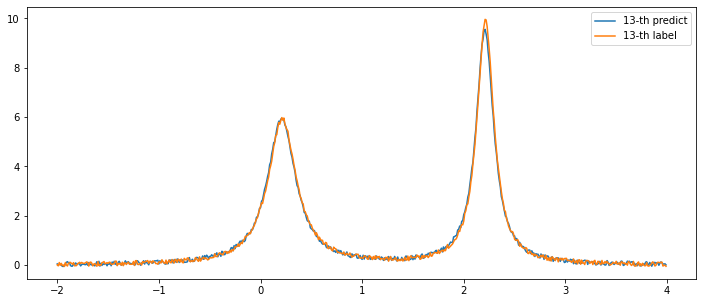

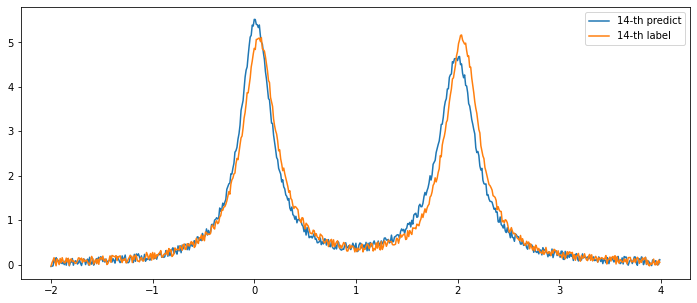

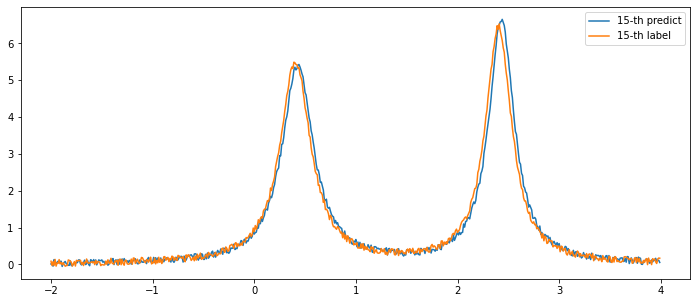

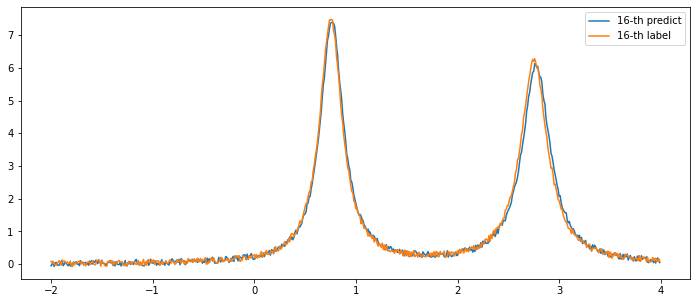

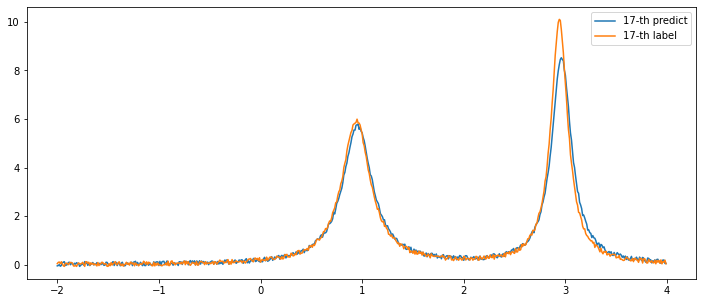

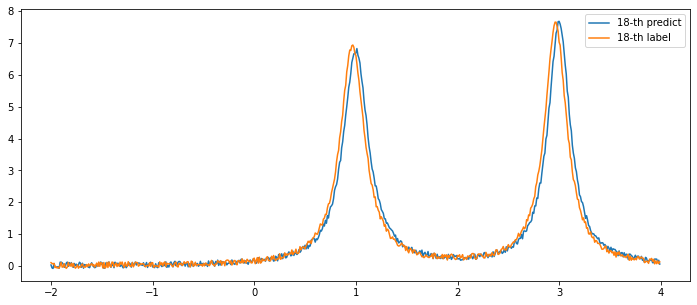

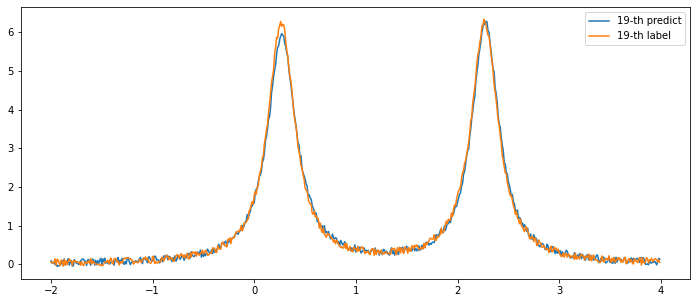

In [ ]:
for i in range(20):
    plt.figure(figsize=(12,5))
    plt.plot(x, Lorentzian(x, *list(predict[i])), label=str(i)+'-th predict')
    plt.plot(x, test_data[i], label=str(i)+'-th label')
    #plt.plot(x, simple(x, *list(predict[i])), label=str(i)+'-th exact')
    plt.legend()
    plt.show()

In [ ]:
# Check the architecture of the CNN
print(model2.layers[0])
print(model2.layers[1])
print(model2.layers[2])
print(model2.layers[3])
print(model2.layers[4])
print(model2.layers[5])
#print(model2.layers[6])
#print(model2.layers[7])


In [ ]:
for i in range(7):
    print(str(i) +'-th layer :', len(model2.layers[i].get_weights()))

0-th layer : 2
1-th layer : 0
2-th layer : 2
3-th layer : 0
4-th layer : 0
5-th layer : 2
6-th layer : 2


In [ ]:
layer_0 = model2.layers[0].get_weights()

layer_2 = model2.layers[2].get_weights()

layer_5 = model2.layers[5].get_weights()

layer_6 = model2.layers[6].get_weights()



In [ ]:
# 첫번째 컨볼루션 필터
filter_0 = layer_0[0]
filter_0.shape # 16개의 필터가 커널사이즈 10으로 존재함

(50, 1, 8)

In [ ]:
# 2번째 컨볼루션 필터
filter_2 = layer_2[0]
filter_2.shape

(40, 8, 8)

In [ ]:
# 완전연결층
layer_5[1].shape

(100,)

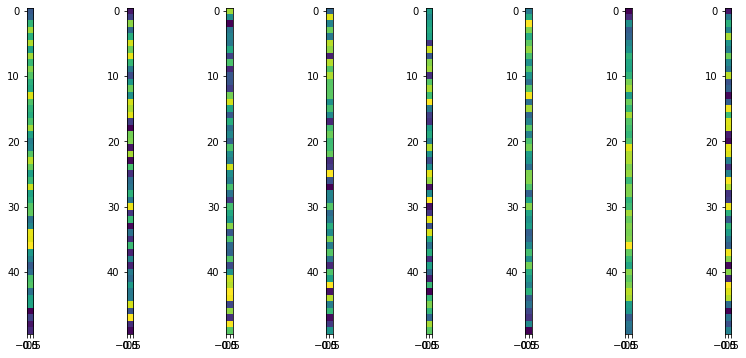

In [ ]:
# 첫번째 컨볼루션 필터 시각화
M = 8
plt.figure(figsize=(14, 6))

for i in range(M):  
    plt.subplot(1, M, i + 1)  # Subplot : from 1 to 8
    plt.imshow(filter_0[ :, :,i]) # 1st-conv filter showing
    plt.grid(False)

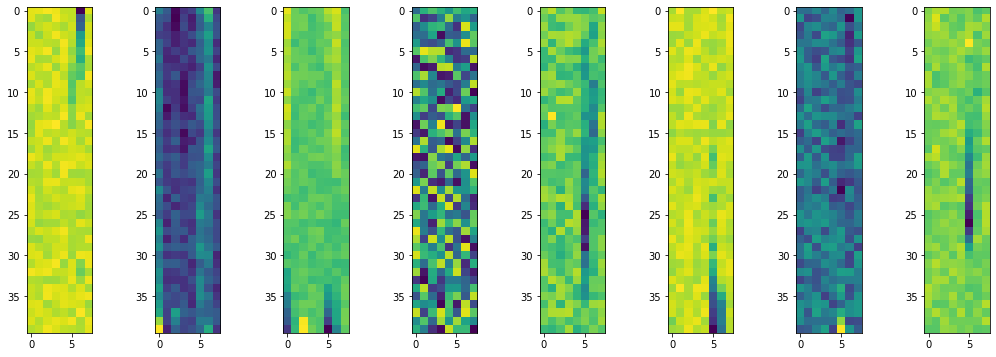

In [ ]:
# 두번째 컨볼루션 필터 시각화
M = 8
plt.figure(figsize=(18, 6))

for i in range(M):
    plt.subplot(1, M, i + 1)  # Subplot from 1 to 8
    plt.imshow(filter_2[:, :, i]) # (10, 16) filter showing -> (10, 16) = (10, 1)filter * 16
    plt.grid(False)

In [ ]:
# 각각의 레이어에서의 출력을 확인하기
import tensorflow.keras.backend as K

# Outputs of each layers
f0 = K.function([model2.input], [model2.layers[0].output])
f1 = K.function([model2.input], [model2.layers[1].output])
f2 = K.function([model2.input], [model2.layers[2].output])
f3 = K.function([model2.input], [model2.layers[3].output])
f4 = K.function([model2.input], [model2.layers[4].output])
f5 = K.function([model2.input], [model2.layers[5].output])
f6 = K.function([model2.input], [model2.layers[6].output])
#f7 = K.function([model2.input], [model2.layers[7].output])


In [ ]:
n = 0
x = train_data[n:n+1]

x.shape

(1, 600, 1)

Text(0.5, 1, 'Input data')

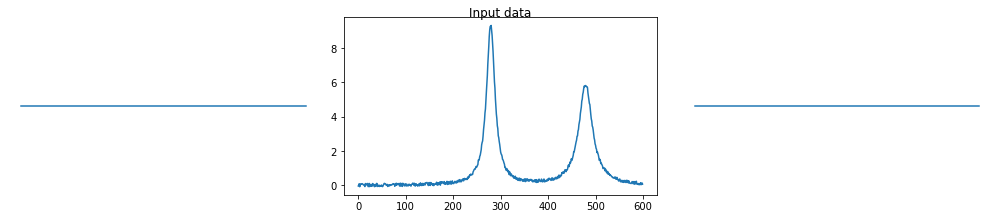

In [ ]:
plt.figure(figsize=(14, 3))  # 피규어 생성하고

for i in range(3): 
    plt.subplot(1, 3, i + 1)  # three Subplot generated
    if i == 1:                # center plot
        plt.plot(x[0])        # image showed
    else:  
        plt.plot(np.zeros_like(x[0]))  # zero image
        plt.axis("off")
plt.tight_layout()
plt.suptitle("Input data", y=1)

In [ ]:
# 1번째 컨볼루션 층 출력결과
z0 = f0([x])[0]
z0.shape

(1, 551, 8)

Text(0.5, 1.1, 'After Cnvolution filter')

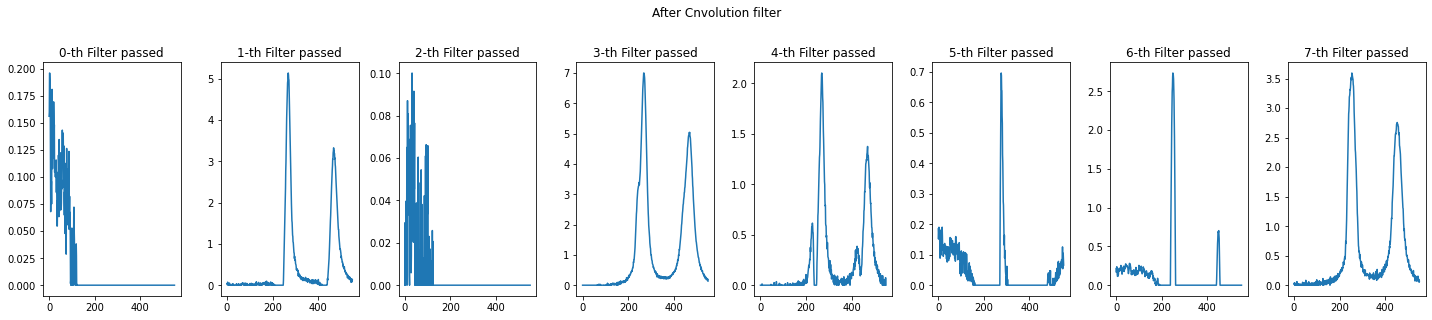

In [ ]:
plt.figure(figsize=(20, 4))

for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.plot(z0[0, :, i])
    plt.axis('on')
    
    plt.title("{}-th Filter passed".format(i))
plt.tight_layout()
plt.suptitle("After Cnvolution filter", y=1.1)

In [ ]:
# 2번째 맥스풀링층 출력 결과
z1 = f1([x])[0]
print(z1.shape)


(1, 275, 8)


Text(0.5, 1.1, 'After MaxPooling1D')

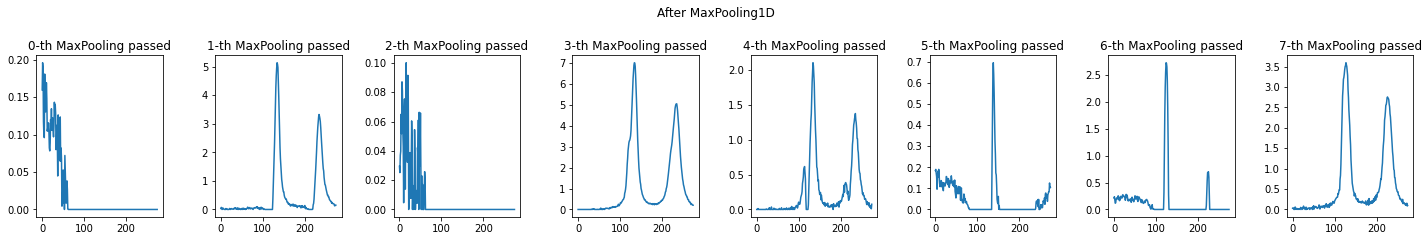

In [ ]:
plt.figure(figsize=(20, 3))

for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.plot(z1[0, :, i])
    
    plt.title("{}-th MaxPooling passed".format(i))
plt.tight_layout()
plt.suptitle("After MaxPooling1D", y=1.1)
        

In [ ]:
# 3번째 컨볼루션 층 출력결과
z2 = f2([x])[0]
print(z2.shape)

(1, 236, 8)


Text(0.5, 1.1, 'After 2nd Conv1D')

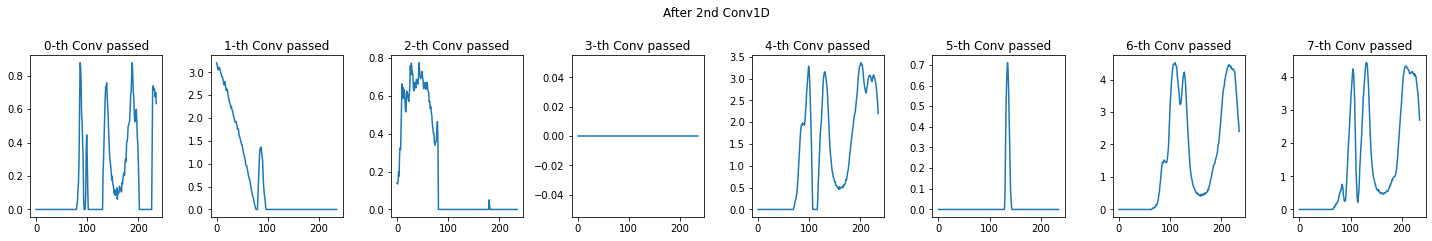

In [ ]:
plt.figure(figsize=(20, 3))

for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.plot(z2[0, :, i])
    
    plt.title("{}-th Conv passed".format(i))
plt.tight_layout()
plt.suptitle("After 2nd Conv1D", y=1.1)

In [ ]:
# 4번째 MaxPooling 층 출력결과
z3 = f3([x])[0]
print(z3.shape)

(1, 118, 8)


Text(0.5, 1.1, 'After 2nd MaxPooling')

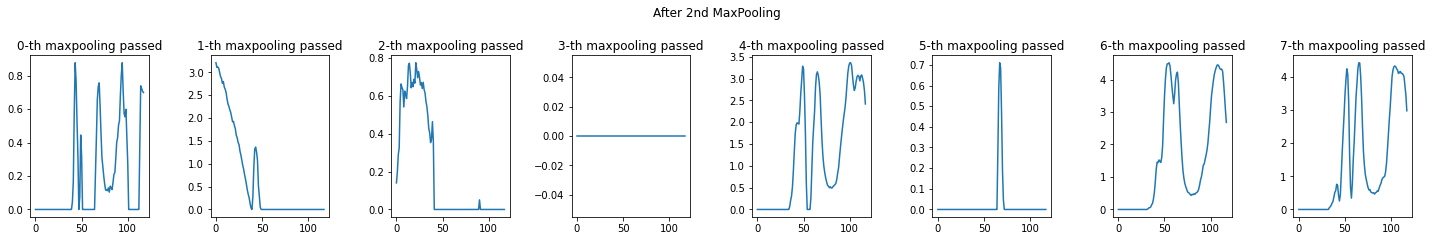

In [ ]:
plt.figure(figsize=(20, 3))

for i in range(8):
    plt.subplot(1, 8, i + 1)
    plt.plot(z3[0, :, i])
    
    plt.title("{}-th maxpooling passed".format(i))
plt.tight_layout()
plt.suptitle("After 2nd MaxPooling", y=1.1)

In [ ]:
# 5번째층 GlobalMaxPooling층 출력 결과
z4 = f4([x])[0]
print(z4.shape)
print(z4)

(1, 8)
[[0.8774236  3.2129307  0.77363235 0.         3.3661776  0.71021676
  4.517044   4.429311  ]]


Text(0.5, 1.0, 'vectorizing')

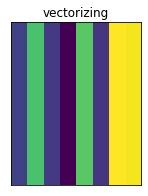

In [ ]:
plt.figure(figsize=(10, 3))
plt.imshow(z4, aspect=10)
plt.xticks([]); plt.yticks([]); plt.grid(False)
plt.title("vectorizing")

(1, 100)


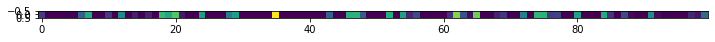

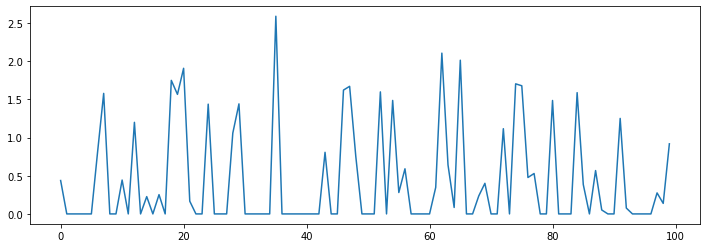

In [ ]:
# 6번째층 Dense Layer(Fully Connected Layer) 출력 결과
z5 = f5([x])[0]
print(z5.shape)

plt.figure(figsize=(12, 4))
plt.imshow(z5)
plt.show()

plt.figure(figsize=(12, 4))
plt.plot(z5[0])
plt.show()

(1, 4)


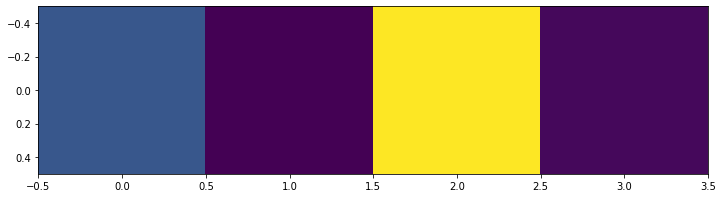

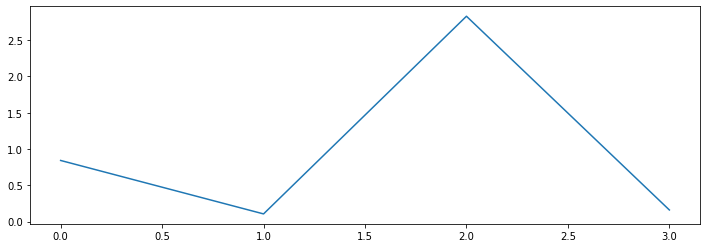

In [ ]:
# 7번째 Dropout 층 출력 결과
z6 = f6([x])[0]
print(z6.shape)

plt.figure(figsize=(12, 4))
plt.imshow(z6)
plt.show()


plt.figure(figsize=(12, 4))
plt.plot(z6[0])
plt.show()

In [ ]:
# 8번째 최종출력층 출력 결과
z7 = f7([x])[0]
print(z7)

plt.figure(figsize=(10,2))
plt.imshow(z7)
plt.show()

NameError: ignored

In [ ]:
# 1차원 데이터에 대응되는 라벨은 뭘로? => 적분값과 peak 수는 안정적인 라벨로 작용, 하지만 목적에 안맞는다.
# 라벨 -> 원래 의도대로 mean position, width로 되돌림
# 로렌치안 함수 정의에 약간의 오류 발견 -> 수정, 재시도하였음
# 이전보다 상당히 나아진 듯, 

# 해석하기 어려운 것
# 각 컨볼루션 층에서의 필터가 의미하는 것?? -> 시각화해도 의미를 설명하기 어렵다.
# 각각의 레이어의 정보를 완전히 표현하는 방법 좀 더 공부..